使用h5py读取v7.3格式文件: new_1.mat
使用h5py读取v7.3格式文件: new_2.mat
使用h5py读取v7.3格式文件: new_3.mat
使用h5py读取v7.3格式文件: new_4.mat
使用h5py读取v7.3格式文件: new_5.mat
使用h5py读取v7.3格式文件: new_6.mat
使用h5py读取v7.3格式文件: new_7.mat
使用h5py读取v7.3格式文件: new_8.mat
使用h5py读取v7.3格式文件: new_9.mat
使用h5py读取v7.3格式文件: new_10.mat
使用h5py读取v7.3格式文件: new_11.mat
使用h5py读取v7.3格式文件: new_12.mat
使用h5py读取v7.3格式文件: new_13.mat
使用h5py读取v7.3格式文件: new_14.mat
使用h5py读取v7.3格式文件: new_15.mat
使用h5py读取v7.3格式文件: new_16.mat
使用h5py读取v7.3格式文件: new_17.mat
使用h5py读取v7.3格式文件: new_18.mat
使用h5py读取v7.3格式文件: new_19.mat
使用h5py读取v7.3格式文件: new_20.mat
使用h5py读取v7.3格式文件: new_21.mat
使用h5py读取v7.3格式文件: new_22.mat
使用h5py读取v7.3格式文件: new_23.mat
使用h5py读取v7.3格式文件: new_24.mat
使用h5py读取v7.3格式文件: new_25.mat
使用h5py读取v7.3格式文件: new_26.mat
使用h5py读取v7.3格式文件: new_27.mat
使用h5py读取v7.3格式文件: new_28.mat
使用h5py读取v7.3格式文件: new_29.mat
使用h5py读取v7.3格式文件: new_30.mat
使用h5py读取v7.3格式文件: new_31.mat
使用h5py读取v7.3格式文件: new_32.mat
Images shape: (32, 400, 400)
KR matrices shape: (32, 1, 3)


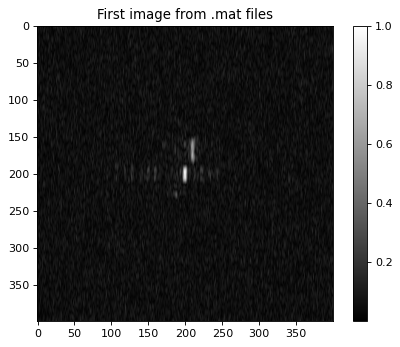

In [2]:
import os
import numpy as np
import h5py
from scipy.io import loadmat
import matplotlib.pyplot as plt
import re

def natural_sort_key(s):
    """为文件名实现自然排序"""
    return [int(text) if text.isdigit() else text.lower() for text in re.split(r'(\d+)', s)]

def read_mat_files(directory_path):
    """
    读取目录中所有.mat文件的img和kR_use变量，支持v7.3格式
    
    参数:
        directory_path: 包含.mat文件的目录路径
        
    返回:
        images: 包含所有img变量的numpy数组
        kr_matrices: 包含所有kR_use变量的numpy数组
    """
    # 获取所有.mat文件并排序
    mat_files = [f for f in os.listdir(directory_path) if f.endswith('.mat')]
    mat_files = sorted(mat_files, key=natural_sort_key)
    
    if len(mat_files) == 0:
        print(f"在{directory_path}中未找到.mat文件")
        return None, None
    
    # 存储提取的变量
    images = []
    kr_matrices = []
    
    # 读取每个文件
    for mat_file in mat_files:
        file_path = os.path.join(directory_path, mat_file)
        try:
            # 首先尝试使用scipy读取
            try:
                mat_contents = loadmat(file_path)
                
                if 'img' in mat_contents:
                    images.append(mat_contents['img'])
                else:
                    print(f"在{mat_file}中未找到'img'变量")
                    images.append(None)
                    
                if 'kR_use' in mat_contents:
                    kr_matrices.append(mat_contents['kR_use'])
                else:
                    print(f"在{mat_file}中未找到'kR_use'变量")
                    kr_matrices.append(None)
                    
            except NotImplementedError:  # v7.3格式会触发此错误
                # 使用h5py读取v7.3格式的mat文件
                print(f"使用h5py读取v7.3格式文件: {mat_file}")
                with h5py.File(file_path, 'r') as f:
                    # h5py以不同方式组织数据，需要转置
                    if 'img' in f:
                        # 对于v7.3格式，需要转置数据
                        img_data = np.array(f['img'])
                        # 如果数据存储为引用，需要进一步处理
                        if isinstance(img_data, h5py.Reference):
                            img_data = f[img_data]
                        # 转置数组以匹配原始MATLAB格式
                        img_data = np.transpose(img_data)
                        images.append(img_data)
                    else:
                        print(f"在{mat_file} (v7.3)中未找到'img'变量")
                        images.append(None)
                    
                    if 'kR_use' in f:
                        kr_data = np.array(f['kR_use'])
                        if isinstance(kr_data, h5py.Reference):
                            kr_data = f[kr_data]
                        kr_data = np.transpose(kr_data)
                        kr_matrices.append(kr_data)
                    else:
                        print(f"在{mat_file} (v7.3)中未找到'kR_use'变量")
                        kr_matrices.append(None)
                
        except Exception as e:
            print(f"读取{mat_file}时出错: {e}")
            import traceback
            traceback.print_exc()
    
    # 转换为numpy数组
    if images and all(img is not None for img in images):
        images = np.array(images)
    if kr_matrices and all(kr is not None for kr in kr_matrices):
        kr_matrices = np.array(kr_matrices)
    
    return images, kr_matrices

# 使用示例
if __name__ == "__main__":
    # 替换为您的.mat文件目录路径
    directory = './wangguangxing_mat/fu15dB_new'
    
    # 读取文件
    images, kr_matrices = read_mat_files(directory)
    
    # 打印形状信息
    if images is not None:
        print(f"Images shape: {images.shape}")
    if kr_matrices is not None:
        print(f"KR matrices shape: {kr_matrices.shape}")
    
    # 可选：显示第一张图像
    if images is not None and len(images) > 0:
        plt.figure()
        plt.imshow(images[0], cmap='gray')
        plt.title("First image from .mat files")
        plt.colorbar()
        plt.show()

In [ ]:
# 针对真实图片生成轨迹
# 添加库函数
import os
import torch
import torch.nn as nn
import math
import torch.optim as optim
from pytorch3d.io import load_obj, save_obj
from pytorch3d.structures import Meshes
from pytorch3d.utils import ico_sphere
from pytorch3d.ops import sample_points_from_meshes
from pytorch3d.loss import (
    chamfer_distance, 
    mesh_edge_loss, 
    mesh_laplacian_smoothing, 
    mesh_normal_consistency,
)
from pytorch3d.utils import ico_sphere
import numpy as np
from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
from pytorch3d.renderer import (
    FoVPerspectiveCameras, look_at_view_transform, look_at_rotation, 
    RasterizationSettings, MeshRenderer, MeshRasterizer, BlendParams,
    SoftSilhouetteShader, HardPhongShader, PointLights, TexturesVertex,OrthographicCameras
)
from pytorch3d.vis.plotly_vis import plot_batch_individually
from pytorch3d.ops.points_normals import estimate_pointcloud_normals
from pytorch3d.ops.mesh_face_areas_normals import mesh_face_areas_normals
from torch.autograd import gradcheck

import plotly.graph_objects as go

from PIL import Image

import re

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

# Set the device
if torch.cuda.is_available():
    device = torch.device("cuda:3")
else:
    device = torch.device("cpu")
    print("WARNING: CPU only, this will be slow!")

def Radarview_generate():

    Round_radar_los_all = torch.tensor(kr_matrices, dtype=torch.float32, device=device)
    Round_radar_los_all = Round_radar_los_all.squeeze(1)  # 去掉多余的维度
    omega_vec_all = torch.tensor([0,0,1], dtype=torch.float32, device=device).repeat(Round_radar_los_all.shape[0], 1)

    radar_los_numpy = Round_radar_los_all.detach().cpu().numpy()

    omega = torch.tensor([1.0],device=device).expand(Round_radar_los_all.shape[0])

    fig = go.Figure(data=[go.Scatter3d(
        x=radar_los_numpy[:,0], 
        y=radar_los_numpy[:,1], 
        z=radar_los_numpy[:,2], 
        mode='markers',
        marker=dict(
            size=2  # 设置点的大小
        )
    )])

    # 可视化转轴方向为一个向量，并将其添加到雷达视线方向图中
    omega_vec_numpy = omega_vec_all.detach().cpu().numpy()
    fig.add_trace(go.Scatter3d(
        x=[0, omega_vec_numpy[5,0]],
        y=[0, omega_vec_numpy[5,1]],
        z=[0, omega_vec_numpy[5,2]],
        mode='lines+markers',
        marker=dict(size=2),
        line=dict(width=2)
    ))

    # 更新布局
    fig.update_layout(scene=dict(
        xaxis_title='X label',
        yaxis_title='Y label',
        zaxis_title='Z label'
    ))

    # 横纵轴equal比例
    fig.update_layout(
        scene_aspectmode='data',
        scene_camera=dict(
            eye=dict(x=5, y=5, z=5)
        )
    )

    # 显示图形
    fig.show()

    # 将图形保存为html文件
    fig.write_html("Radar_los.html")

    return Round_radar_los_all,omega_vec_all,omega

Round_radar_los_all,Round_radar_los_real_all,omega_vec_all,omega = Radarview_generate()
# 生成雷达视线方向和转轴方向的函数

NameError: name 'omega' is not defined